In [36]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

training_folder = r'../'
gis_folder = training_folder + r'gis/corse/'
data_folder = training_folder + r'data/corse/'

# chargement des données

In [37]:
nodes = gpd.read_file(gis_folder + r'osmdrive/nodes/nodes.shp')
stops = gpd.read_file(gis_folder + r'stops_corse.shp')
communes = gpd.read_file(gis_folder + r'communes_corse.shp')

In [38]:
commune_node_distance_dataframe = pd.read_hdf(data_folder + 'distance_to_node.hdf', 'communes')
stop_node_distance_dataframe = pd.read_hdf(data_folder + 'distance_to_node.hdf', 'stops')

In [40]:
commune_node_distance_dataframe

,commune_node,commune,distance
0,60623823,2A001,0.000000
1,415942893,2A001,0.000000
2,415915938,2A001,0.000000
3,415918085,2A001,0.000000
4,415918087,2A001,0.000000
5,415918089,2A001,0.000000
6,415918101,2A001,0.000000
7,415918102,2A001,0.000000
8,415918105,2A001,0.000000
9,415918116,2A001,0.000000


# Sélection du nœud le plus proche pour chaque stop et chaque commune

In [41]:
stop_nearest_node = stop_node_distance_dataframe.groupby(
    'stop', as_index=False)['stop_node'].first()

In [42]:
commune_nearest_node = commune_node_distance_dataframe.groupby(
    'commune', as_index=False)['commune_node'].first()

In [43]:
stop_nearest_node.head()

,stop,stop_node
0,0,255850481
1,1,276984551
2,2,417009678
3,3,258557760
4,4,258557760


In [44]:
commune_nearest_node.head()

,commune,commune_node
0,2A001,60623823
1,2A004,5856810247
2,2A006,417780468
3,2A008,5864513375
4,2A011,6426306560


In [45]:
commune_nearest_node.to_csv(data_folder+'commune_nearest_node.csv',index=False)
stop_nearest_node.to_csv(data_folder+'stop_nearest_node.csv', index=False)

# Contrôle

In [46]:
%matplotlib notebook

<IPython.core.display.Javascript object>


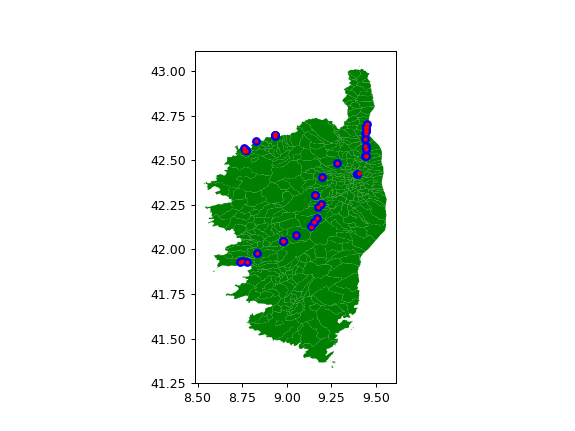

In [47]:
merged = pd.merge(nodes, stop_nearest_node, right_on='stop_node', left_on='osmid')
# On trace pour chaque station : la localisation de la station et du nœud le plus proche
commune_plot = communes.plot(color='green')
stop_plot = stops.plot(ax=commune_plot, color='blue')
merged.plot(ax=stop_plot, color='red', markersize=5)
plt.savefig(r'../plot/stop_nearest_node.png')

In [ ]:
merged = pd.merge(nodes, commune_nearest_node, right_on='commune_node', left_on='osmid')
# On trace pour chaque station : la localisation de la station et du nœud le plus proche
commune_plot = communes.plot(color='green')
merged.plot(ax=commune_plot, color='red', markersize=5)
plt.savefig(r'../plot/commune_nearest_node.png')